### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_process.signal_tools import signal_transform
%matplotlib widget

### FFT

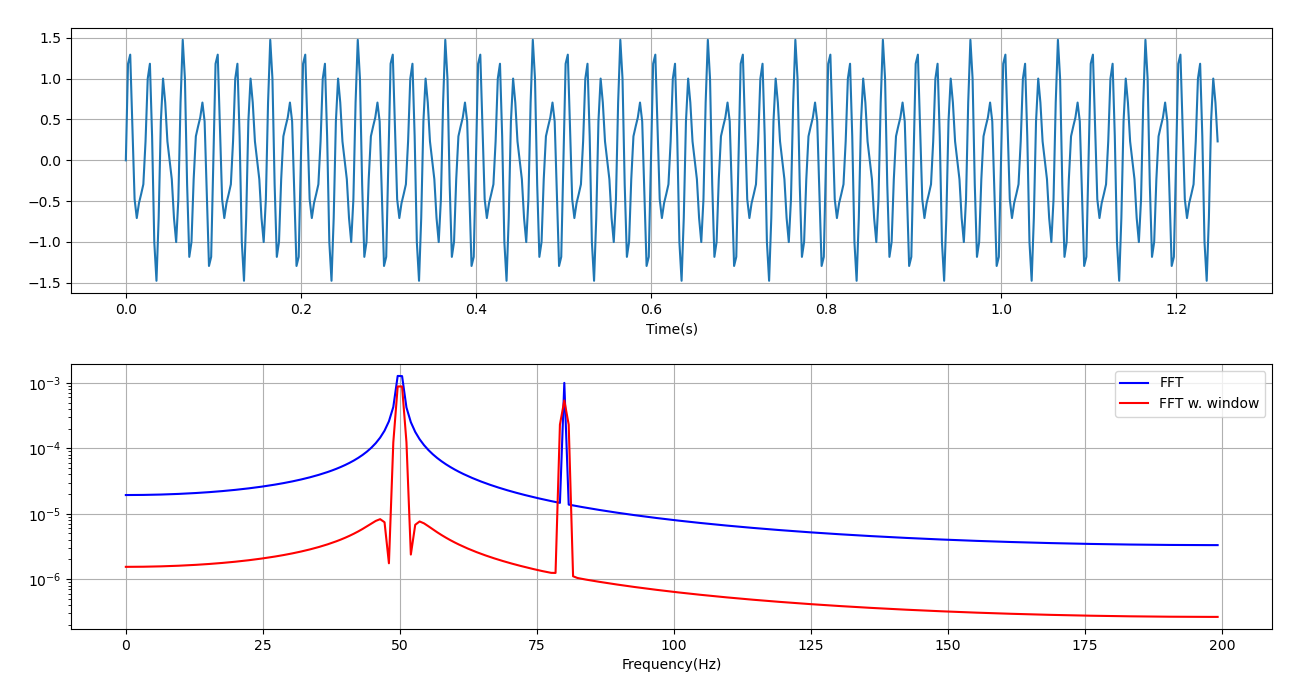

In [2]:
N = 500
f = 400.0

time = np.linspace(0.0, N/f, N, endpoint=False)
signal = np.sin(50.0 * 2.0*np.pi*time) + 0.5*np.sin(80.0 * 2.0*np.pi*time)

xf, yf = signal_transform.fft(time, signal)
xwf, ywf = signal_transform.fft(time, signal, window_fun='hamming')

fft_fig = plt.figure(1)
fft_fig.clear()
fft_fig, fft_ax = plt.subplots(num=1, nrows=2, ncols=1)

fft_ax[0].plot(time, signal)
fft_ax[0].grid()
fft_ax[0].set_xlabel('Time(s)')

fft_ax[1].semilogy(xf,  2.0/N * np.abs(yf), '-b')
fft_ax[1].semilogy(xwf, 2.0/N * np.abs(ywf), '-r')
# fft_ax[1].plot(xf,  np.abs(yf),  '-b')
# fft_ax[1].plot(xwf, np.abs(ywf), '-r')
fft_ax[1].legend(['FFT', 'FFT w. window'])
fft_ax[1].grid()
fft_ax[1].set_xlabel('Frequency(Hz)')

fft_fig.set_size_inches(13, 7)
fft_fig.tight_layout(pad=2.0)
plt.show()

### STFT

times length: 1000
freqs length: 101
w shape:     (101, 1000)


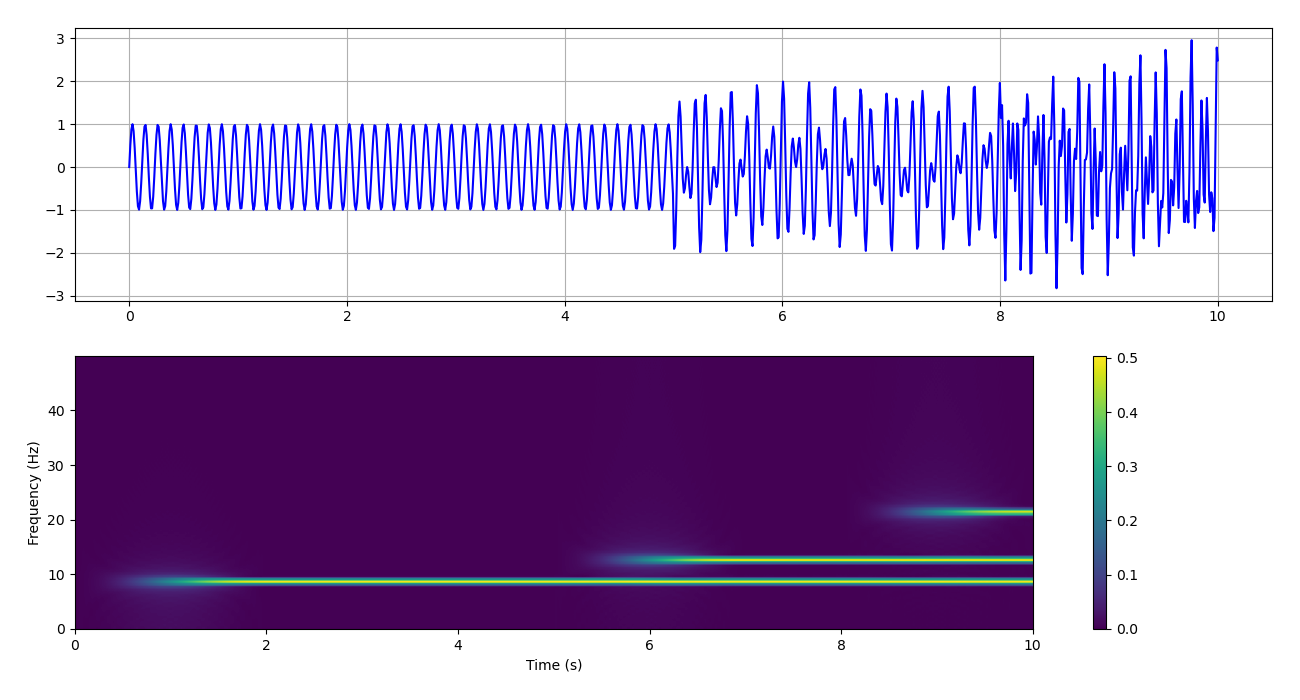

In [3]:
f=100
t_stop=10

N=int(t_stop*f)
time = np.linspace(0.0, 10, N, endpoint=True)
signal = np.sin(8.53 * 2.0*np.pi*time) + \
         np.sin(12.53 * 2.0*np.pi*time) * np.heaviside(time-5, 0.5) + \
         np.sin(21.34 * 2.0*np.pi*time) * np.heaviside(time-8, 0.5)

times, freqs, w = signal_transform.stft(time, signal,
                                        window_fun='hamming', window_length=200, window_stride=1)

print(f'times length: {len(times)}')
print(f'freqs length: {len(freqs)}')
print(f'w shape:     {w.shape}')

stft_fig = plt.figure(2)
stft_fig.clear()
stft_fig, stft_ax = plt.subplots(num=2, nrows=2, ncols=1)

stft_ax[0].plot(time, signal, '-b')
stft_ax[0].grid()

sftf_im = stft_ax[1].imshow(np.abs(w), aspect='auto', origin='lower', cmap='viridis', extent=[times[0], times[-1], freqs[0], freqs[-1]])
stft_ax[1].set_xlabel('Time (s)')
stft_ax[1].set_ylabel('Frequency (Hz)')
stft_fig.colorbar(sftf_im)

stft_fig.set_size_inches(13, 7)
stft_fig.tight_layout(pad=2.0)
plt.show()